# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
3 3 1 0 0 3 3 5 3 0 0 4 1 5 1 6 5 4 7 4
5 3 3 0 2 3 1 4 1 2 4 3 4 5 4 0 5 6 6 3
5 4 1 3 3 6 3 1 1 5 2 3 5 3 3 4 1 5 6 1
3 3 3 5 6 1 2 1 3 4"""
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([3, 3, 1, 0, 0, 3, 3, 5, 3, 0, 0, 4, 1, 5, 1, 6, 5, 4, 7, 4, 5, 3, 3,
       0, 2, 3, 1, 4, 1, 2, 4, 3, 4, 5, 4, 0, 5, 6, 6, 3, 5, 4, 1, 3, 3, 6,
       3, 1, 1, 5, 2, 3, 5, 3, 3, 4, 1, 5, 6, 1, 3, 3, 3, 5, 6, 1, 2, 1, 3,
       4])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[0, 1, 2, 3, 4, 5, 6, 7]
[6, 12, 4, 20, 10, 11, 6, 1]
[0.086, 0.171, 0.057, 0.286, 0.143, 0.157, 0.086, 0.014]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.086,  0.257,  0.314,  0.6  ,  0.743,  0.9  ,  0.986,  1.   ])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,6,0,0.086,0.086
1,12,1,0.171,0.257
2,4,2,0.057,0.314
3,20,3,0.286,0.600
4,10,4,0.143,0.743
5,11,5,0.157,0.900
6,6,6,0.086,0.986
7,1,7,0.014,1.000


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 0, 12,  8, 60, 40, 55, 36,  7])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

218
70


3.1142857142857143

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  1.00000000e+00,   3.11428571e+00,   9.69877551e+00,
         3.02047580e+01,   9.40662464e+01,   2.92949167e+02,
         9.12327407e+02,   2.84124821e+03])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([   1,    1,    2,    6,   24,  120,  720, 5040])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.04441022,  0.04441022,  0.04441022,  0.04441022,  0.04441022,
        0.04441022,  0.04441022,  0.04441022])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.04441022,  0.13830611,  0.21536236,  0.22356665,  0.1740626 ,
        0.10841614,  0.05627314,  0.0250358 ])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(8, array(70)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  3.10871522,   9.68142739,  15.07536551,  15.64966515,
        12.18438215,   7.58912946,   3.93911957,   1.75250626])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([  2.89128478,   2.31857261, -11.07536551,   4.35033485,
        -2.18438215,   3.41087054,   2.06088043,  -0.75250626])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([   8.35952769,    5.37577893,  122.66372127,   18.92541328,
          4.7715254 ,   11.63403787,    4.24722813,    0.56626567])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([ 2.68906191,  0.55526718,  8.13669965,  1.20931746,  0.39160996,
        1.53298714,  1.07821762,  0.32311763])

In [16]:
abs_Ni_2_Ni.sum()

15.916278551458698

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

6.9581392757293488

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,3.108715,0.044410,1.000000,0.04441,0,2.891285,8.359528,2.689062,1,0
1,9.681427,0.138306,3.114286,0.04441,12,2.318573,5.375779,0.555267,1,1
2,15.075366,0.215362,9.698776,0.04441,8,-11.075366,122.663721,8.136700,2,2
3,15.649665,0.223567,30.204758,0.04441,60,4.350335,18.925413,1.209317,6,3
4,12.184382,0.174063,94.066246,0.04441,40,-2.184382,4.771525,0.391610,24,4
5,7.589129,0.108416,292.949167,0.04441,55,3.410871,11.634038,1.532987,120,5
6,3.939120,0.056273,912.327407,0.04441,36,2.060880,4.247228,1.078218,720,6
7,1.752506,0.025036,2841.248210,0.04441,7,-0.752506,0.566266,0.323118,5040,7


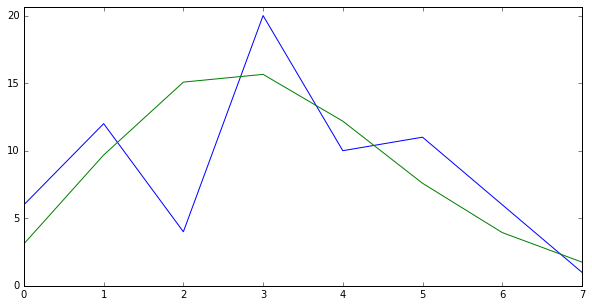

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys) - 1)
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()